[link text](https://)# Import libraries

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#*numpy is like a powerful calculator for arrays and numbers in Python*

#*matplotlib.pyplot means draw graphs to understand our data visually*

#*pandas is a python library for working with data(tables,spreadsheets etc.,)*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
#data variablecsv valus is stored
data = pd.read_csv('Salary_Data.csv')

#*This code loads the contents of the file Salary_Data.csv into a pandas DataFrame*


In [8]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:

independent = data[["YearsExperience"]] #Indepedent Variable,years of Experience, datatype float
dependent = data[["Salary"]] # Depedent Variable, Salary, datatype float

#creating a separate dataset (independent) that contains only the Years of Experience values.

#dependent → is a new DataFrame containing only the Salary column

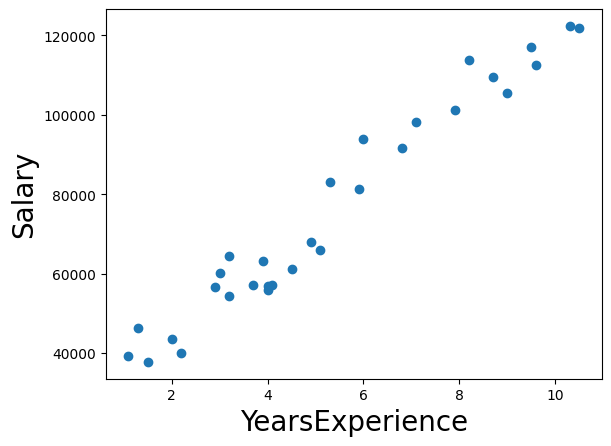

In [10]:
plt.scatter(independent,dependent)
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

#*Creates a scatter points on a graph (X axis & y axis)*

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size = 1/3, random_state = 0)

#*this function is used to split dataset into training data and testing data*

#*test_size = 1/3 → means 33% of the data will be used for testing, and 67% for training*

#*random_state = 0, the split is always the same whenever run the code*

In [14]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0


In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#y=W*x1+b0 for this equation we got value for b1 and bo


LinearRegression()

#*Creates an empty Linear Regression model object named regressor*

#*Creates an empty Linear Regression model object named regressor, at this point it is just ready to be trained*

#*.fit() means trains the model using the data we provide.

In [23]:
# Viewing the b1 and bo value
weight=regressor.coef_
print("Weight of the model={}".format(weight))
bais=regressor.intercept_
print("Intercept of the model={}".format(bais))

Weight of the model=[[9345.94244312]]
Intercept of the model=[26816.19224403]


#*weight tells to us how strongly YearsExperience affects Salary*

#*bais tells that the starting salary for someone with 0 years of experience according to our model*

In [24]:
y_pred=regressor.predict(X_test)

#*tells the model to predict output values using the input data we provide*

In [26]:
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [27]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

 #*measure how good our model is*

#*r2 score which measures how well our model’s predictions match the actual data*


In [30]:
r_score

0.9749154407708353

#*0.97 nearly 1 is coming, so the model is performing very well*

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

#*This code is used to save our trained model*

#*wb means opens the file in write binary(wb) mode, so it can store the model*

#*pickle.dump means saves a Python object to a file*


In [42]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.predict([[15]])
print(result)

[[167005.32889087]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#*rb means, opens the file in read-binary mode*

In [37]:
prediction_input=int(input("Enter the Prediction input value:"))

Enter the Prediction input value:14


In [43]:
Future_Prediction=regressor.predict([[prediction_input]])# change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[[157659.38644774]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#*regressor.predict() means uses the trained model to make a prediction*

#*Double brackets [[ ]] are needed because the model expects a 2D array (even for a single input)

#*{}"  a string with {} as a placeholder